# ¿Cómo preproceso los datos de texto de las reseñas de Yelp para poder analizarlos?

## Metas

Al final de este caso, comprenderá qué es el Procesamiento del lenguaje natural (NLP) y cómo puede ser útil. Obtendrá más experiencia con NLTK, una biblioteca de Python que implementa muchos algoritmos comunes de PNL. Obtendrá información sobre los desafíos específicos de la PNL y herramientas como la vectorización, las palabras vacías, la tokenización y el etiquetado de partes del discurso para abordar estos desafíos.

La PNL es un campo que avanza rápidamente, y simplemente mantenerse al día con los nuevos hitos parece desalentador. Sin embargo, la mayoría de estos avances son ajustes en conceptos más antiguos, por lo que comprender los fundamentos lo pondrá en camino para mantenerse relevante.

## Introducción 

**Contexto de Negocios.** Eres un consultor de negocios para pequeñas y medianas empresas con una gran cantidad de clientes. Los ejemplos de tales negocios pueden incluir un restaurante de comidas rápidas, una tienda de ropa o un distribuidor en línea de equipos para pasatiempos. Le gustaría ayudar a sus pequeñas empresas a comprender qué factores impulsan las experiencias positivas y negativas de los clientes. Los clientes a menudo no están dispuestos a dar retroalimentación directa, pero dejan una gran cantidad de reseñas en línea en sitios web como Yelp, Amazon, etc. Le gustaría desarrollar un servicio que permitiera a las empresas obtener rápidamente resúmenes útiles de sus reseñas en dichos sitios web. Dicho servicio permitiría a sus clientes responder preguntas como: "¿Cuáles son los factores más importantes que generan críticas negativas?" o "¿Un cambio de política reciente mejoró nuestras reseñas?"

**Problema comercial.** Su tarea principal es **arreglar un conjunto de datos de revisiones de texto e diseñar funciones relevantes para facilitar el análisis posterior y la creación de modelos**.

**Contexto analítico.** Los datos de texto están muy desestructurados y, a menudo, requieren un procesamiento previo antes de que podamos recopilar información comercial a partir de ellos. Aprovecharemos las herramientas de **procesamiento del lenguaje natural (NLP)** para ayudarnos a procesar estos datos y generar nuevas funciones que se pueden usar para análisis o creación de modelos.

El caso procederá de la siguiente manera: (1) presentaremos pasos básicos de preprocesamiento como tokenización de palabras y visualización de texto; (2) introducir herramientas clave en la extracción de características, como n-gramas, representaciones de conteo y palabras vacías; (3) aprovechar estas herramientas para realizar análisis exploratorios de datos; y finalmente (4) observe las herramientas puras de disputa de texto como las expresiones regulares.

## Contexto sobre NLP 

Algunas de las historias de éxito más famosas relacionadas con la NLP provienen de Google, donde se utiliza para dar muy buenas respuestas a búsquedas en Internet vagas o mal escritas, [traducciones automáticas] bastante comprensibles (https://www.blog.google/products/translate/ traducciones neuronales de mayor calidad-grupo-más-idiomas/) de texto sin formato, y los famosos [subtítulos generados automáticamente](https://ai.googleblog.com/2009/12/automatic-captioning-in-youtube.html ) para la mayoría de los videos de YouTube.

NLP tiene una gama tan diversa de usos que puede ser difícil encontrar una definición sucinta para ella. En general, las computadoras prefieren los datos numéricos y los lenguajes formales, como las matemáticas y los lenguajes de programación, mientras que los humanos prefieren comunicarse en los llamados "lenguajes naturales": inglés, español, etc. Cada vez que tratamos de construir un puente entre la computadora y los humanos, NLP entra en juego. Entonces

- Para ayudar a las computadoras a comprender el habla humana (piense en Siri), usamos NLP y procesamiento de audio
- Para traducir automáticamente entre diferentes idiomas naturales (piense en Google Translate), usamos NLP
- Para aplicar automáticamente etiquetas o categorías a los textos naturales (piense en los detectores de spam que mantienen el correo electrónico no deseado fuera de su bandeja de entrada), usamos NLP
- Para que las computadoras lean el texto en voz alta para usar (piense en Kindle convirtiendo libros electrónicos en audiolibros), nuevamente usamos NLP con procesamiento de audio

¡NLP es un campo enorme! En este caso, nos centraremos en algunos algoritmos fundamentales de NLP que se utilizan en todos los casos anteriores.


### Desafío 1: dimensionalidad extraordinariamente alta

Considere el libro *Guerra y paz*. Tiene 3 millones de caracteres. ¿Podemos ver esto como un vector largo de cadenas que toman valores en un espacio de 3 millones de dimensiones y luego aplicar métodos de aprendizaje automático aquí? Esta es una mala idea por dos razones:

1. Los enfoques básicos tienen un rendimiento terrible en espacios de dimensiones tan altas
2. Estos enfoques "pierden" algunas reglas importantes sobre el lenguaje que todos conocemos; p.ej. que "no" y "no" significan lo mismo

Como resultado, una gran cantidad de NLP implica encontrar formas de resumir vectores increíblemente largos de manera concisa, de modo que podamos explorar, analizar y construir modelos con ellos de manera manejable más adelante.

### Desafío 2: el texto es específico del contexto

Por ejemplo, la palabra *reina* tiene muchos usos en inglés que son tanto *muy diferentes* como *comunes*:

1. El gobernante de un país
2. Una medida de colchón
3. La pieza más poderosa del ajedrez
4. El insecto madre en ciertos tipos de colonias de insectos.

Las bibliotecas de propósito general tendrán que lidiar con todos estos, pero las revisiones de colchones casi siempre serán sobre el segundo. Este tipo de discrepancia puede generar resultados engañosos que un equipo que esté familiarizado con los cálculos subyacentes de NLP puede corregir fácilmente.

## Preprocesamiento y estandarización

La estandarización del texto implica muchos pasos. Algunos de estos incluyen:

1. Corrección de errores simples. Por ejemplo, un texto diferente puede usar codificaciones diferentes y es posible que los caracteres especiales estén dañados y deban repararse.
2. Crear características (p. ej., etiquetar sustantivos y verbos en una oración).
3. Reemplazar palabras y oraciones por completo (por ejemplo, estandarizar la ortografía cambiando "yuuuuuuck!" a "yuck", o pasos más extremos como reemplazar palabras con casi sinónimos)

En un sentido amplio, la estandarización es similar a la disputa de datos con datos más convencionales; estamos corrigiendo errores, eliminando valores atípicos y transformando características. Sin embargo, los detalles de la PNL tienden a ser más complicados. Usaremos la biblioteca [Natural Language Toolkit (`nltk`) de Python] (https://www.nltk.org/). Esta biblioteca tiene funciones que hacen la mayoría de los conceptos básicos en NLP.

NLTK es un gran lenguaje para aprender sobre PNL en Python. Implementa casi todos los algoritmos estándar utilizados en NLP en Python puro y es muy legible. Tiene una excelente documentación y un libro complementario, y a menudo implementa varias alternativas al mismo algoritmo para que puedan compararse.
    
Otra biblioteca NLP en Python es [spaCy](https://spacy.io/). SpaCy es más moderno que NLTK y está más centrado en el uso industrial que en la educación. Es obstinado y, a menudo, implementa solo un único algoritmo en lugar de todas las alternativas. Se centra en la velocidad y la eficiencia sobre la legibilidad y, como resultado, su código fuente es menos legible.

Ambas son excelentes bibliotecas de PNL para familiarizarse. En este caso, usaremos NLTK, pero casi todas las funciones que cubrimos también se pueden usar en spaCy.

**NOTA:** *Muchos pipelines de texto comienzan, con pasos iniciales de "limpieza" que involucran cosas como: convertir todos los caracteres a minúsculas, expandir las contracciones, etc. Nuestra razón principal para omitir este paso inicial es que debe tomar algunas decisiones importantes y muy sensibles al contexto en estos pasos. Por ejemplo, la corrección automática de la ortografía de un documento puede ser muy útil para reducir el ruido (por ejemplo, si hay palabras importantes y difíciles de escribir en el documento, como "Poughkeepsie"), pero también puede destruir la parte más importante del documento. señal (por ejemplo, nombres de marca de autocorrección de empresas como "Rappi" a "rapping"). Del mismo modo, es posible que los pasos que describimos aquí deban adaptarse adecuadamente a otros contextos, como otros idiomas, programas de computadora, documentos legales, etc.*.

Nuestros datos serán:

1. **review_id:** a unique id for that review
2. **user_id:** an anonymized identifier for the user that left the review (some users leave multiple reviews)
3. **business_id:** an anonymized identifier for the business that the review is about (most businesses have multiple reviews) 
4. **stars:** the start rating (1-5) that the reviewer rated the business
5. **date:** the date the review was left
6. **text:** the full text of the review
7. **useful:** the number of readers who rated the review as useful
8. **funny:** the number of readers who rated the review as funny
9. **cool:** the number of readers who rated the review as cool

In [1]:
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import numpy  as np
import string
import plotly
from nltk.stem import PorterStemmer 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('sdata.csv')
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [3]:
AllReviews = data['text']
AllReviews.head()

0    Super simple place but amazing nonetheless. It...
1    Small unassuming place that changes their menu...
2    Lester's is located in a beautiful neighborhoo...
3    Love coming here. Yes the place always needs t...
4    Had their chocolate almond croissant and it wa...
Name: text, dtype: object

### Tokenizando las oraciones

Al igual que los datos CSV se componen de características, los datos de texto se componen de oraciones. Por lo tanto, un primer paso natural es lo que se conoce como [**tokenización de oraciones**](https://www.nltk.org/api/nltk.tokenize.html): dividir un documento largo en sus oraciones componentes. Al principio, esto puede parecer trivial: simplemente divida cada vez que vea un punto. Desafortunadamente, el mismo símbolo se usa de otras formas en inglés (por ejemplo, para marcar una abreviatura, como parte de puntos suspensivos, etc.), por lo que se requiere un poco más de cuidado. Afortunadamente, hay paquetes que harán esto por nosotros. Dentro de `nltk`, podemos usar la función `nltk.sent_tokenize()`.

Nota: La literatura de NLP usa palabras comunes de manera técnica. Por ejemplo, un "documento" significa cualquier cadena independiente que podría ser parte de una colección más grande. A veces, estos pueden ser documentos tal como los consideramos (artículos, documentos, etc.) como parte de una colección de dichos documentos. Sin embargo, también usaríamos "documento" para referirnos a cada tweet en una colección de tweets, o cada reseña en una colección de reseñas (como en el conjunto de datos con el que trabajaremos ahora). Así que recuerde, un "documento" es solo un elemento que contiene texto en lenguaje natural que forma parte de una colección más grande de elementos similares.

### Ejercicio 1

Dé un ejemplo de una pregunta que podríamos responder con este tipo de datos y otra pregunta para la que necesitaríamos datos adicionales. Supongamos por ahora que todas las reseñas provienen de un solo negocio.

**Respuesta.** Una persona que lea esto podría descubrir las características más apreciadas de un negocio al:

1. Buscar características que sean elogiadas constantemente (por ejemplo, "excelente servicio al cliente")
2. Buscar funciones que aparezcan con mayor frecuencia en reseñas positivas

Por otro lado, sería muy difícil sacar conclusiones sobre cómo le está yendo al negocio con respecto a los locales frente a los turistas en función de este conjunto de datos.

Aquí, cada "documento" es solo una revisión. Echemos un vistazo a la primera revisión de "documento" en nuestro conjunto de datos y tokenícelo:

In [4]:
# Print text of first Yelp review
AllReviews[0]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [5]:
# sentence tokenization
sentences = nltk.sent_tokenize(AllReviews[0])
for sentence in sentences:
    print(sentence)
    print()

Super simple place but amazing nonetheless.

It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard.

Staff was very helpful and friendly.



Puede parecer que la tokenización de oraciones es fácil, pero recuerda que el punto `.` se puede usar de muchas maneras diferentes. En el documento:
    
```
Tom escribió una carta al Sr. Plod, su tío. "Llegaré el lunes 5 de enero. Por favor, reúnase conmigo aproximadamente a las 17:00".
```

Un tokenizador de oraciones tiene que ser lo suficientemente inteligente para tokenizar esto de la siguiente manera:

```
[
"Tom le escribió una carta al Sr. Plod, su tío.",
"Llegaré el lunes 5 de enero".
"Por favor, reúnase conmigo aproximadamente a las 5 p. m."
]
```

Además, las diferentes formas en que las personas usan abreviaturas y puntuación pueden hacer que esta sea una tarea definitivamente no trivial.

### Tokenizando palabras

Podemos usar `nltk.word_tokenize()` de `nltk`:

In [6]:
sentences = nltk.sent_tokenize(data['text'][1])
for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    print(sentence)
    print(words)
    print()

Small unassuming place that changes their menu every so often.
['Small', 'unassuming', 'place', 'that', 'changes', 'their', 'menu', 'every', 'so', 'often', '.']

Cool decor and vibe inside their 30 seat restaurant.
['Cool', 'decor', 'and', 'vibe', 'inside', 'their', '30', 'seat', 'restaurant', '.']

Call for a reservation.
['Call', 'for', 'a', 'reservation', '.']

We had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains.
['We', 'had', 'their', 'beef', 'tartar', 'and', 'pork', 'belly', 'to', 'start', 'and', 'a', 'salmon', 'dish', 'and', 'lamb', 'meal', 'for', 'mains', '.']

Everything was incredible!
['Everything', 'was', 'incredible', '!']

I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go.
['I', 'could', 'go', 'on', 'at', 'length', 'about', 'how', 'all', 'the', 'listed', 'ingredients', 'really', 'make', 'their', 'dishes', 'amazing', 'but', 'honestly', 'you', 'just', 'need', '

### Ejercicio 2

Realice un análisis exploratorio de los tamaños de las reseñas: encuentre las reseñas más cortas y más largas, luego trace un histograma que muestre la distribución de la duración de las reseñas.

In [7]:
review_words_lengths = AllReviews.apply(lambda x: len(nltk.word_tokenize(x)))

In [8]:
min(review_words_lengths)

2

In [9]:
## This review has been written in a different language 
AllReviews[review_words_lengths[review_words_lengths == 2].index]

6687    在拉斯维加斯买了新房子，本来想安装布艺窗帘， 但是经过小刘的介绍，知道拉斯维加斯特别热，布艺...
Name: text, dtype: object

In [10]:
max(review_words_lengths)

1148

In [11]:
AllReviews[review_words_lengths[review_words_lengths == max(review_words_lengths)].index]
print(AllReviews[9349])

Alright...this is a bit of a mixed bag review-wise...not because there is some good and bad, but because...well...read the review.

It was my birthday...or a few days later.  A friend and I were celebrating.  Smallman Galley was on my "list" to try.  I didn't know what to expect.  But I think I had in my mind a vision of what this "chef incubator" was going to be.  

Things I didn't expect:  picnic table seating, 4 "store fronts", people lined up ordering from the counter.  So...go into it with that expectation.  I kind of love the idea of the place, but if you were thinking to woo your lady love (or man love, whatevs) with a candle-lit dinner in a cozy restaurant with amazing service...well, you'd  miss the mark.

I had to wait.  My friend was late.  I was sitting at the bar, so I didn't really care.  I perused the menu.  First drink that popped out at me was a Primus song.  "Jerry Was a Race Car Driver" reportedly had:  Amara Sfumato Rabarbaro, Aperol, Genepy des Alpes, pluot syrup, 

<Axes: >

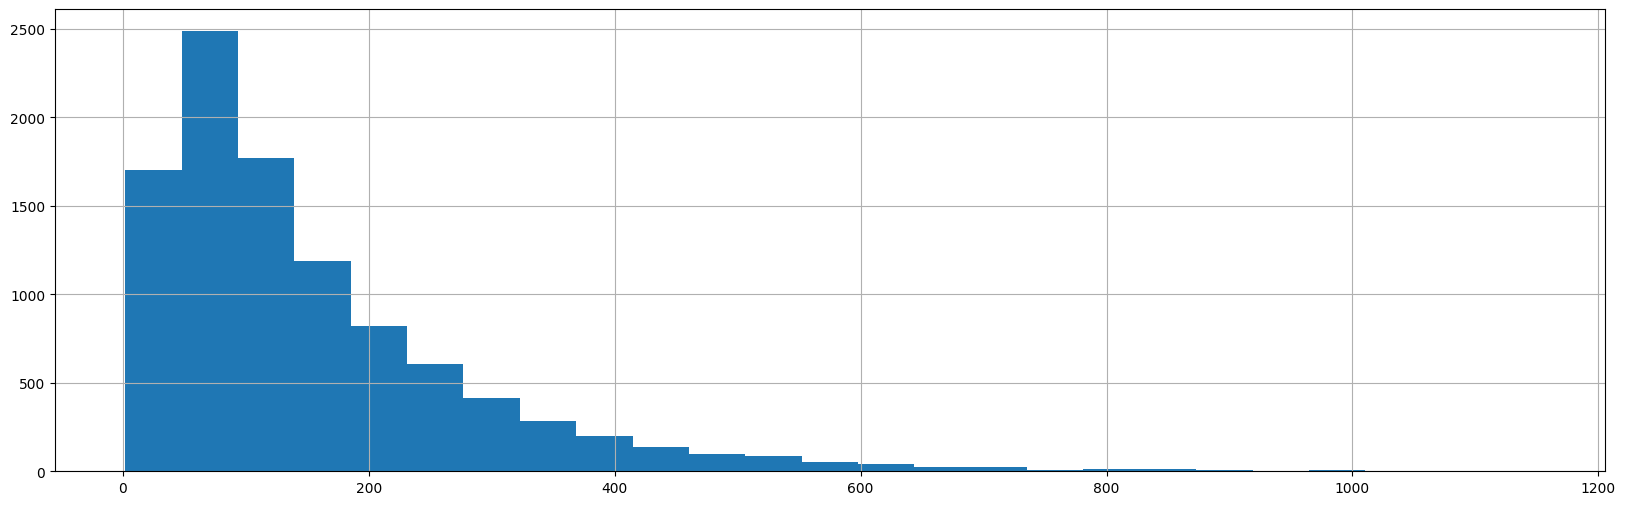

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
review_words_lengths.hist(bins = 25)

## Word Clouds

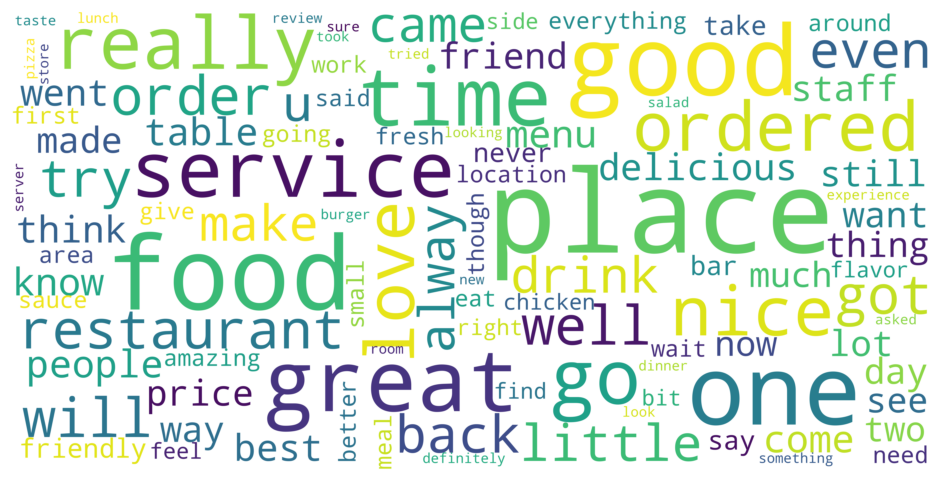

In [13]:
# Importing the required parameter for plotting 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_text = ''.join(data.text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Nota:** Si bien las nubes de palabras pueden ser una forma útil de obtener rápidamente información de alto nivel sobre datos textuales sin procesar, también son limitadas. De alguna manera, pueden verse como los gráficos circulares de la NLP: se usan con frecuencia, pero también se odian con frecuencia. [Algunos](https://www.niemanlab.org/2011/10/word-clouds-considered-dañino/) [personas](https://towardsdatascience.com/can-we-please-stop-using-word -clouds-eca2bbda7b9d) preferiría que no existieran en absoluto. Sin embargo, si se usan de la manera correcta, definitivamente merecen su lugar en el cinturón de herramientas de un científico de datos.

El principal problema de las nubes de palabras es que son difíciles de interpretar de forma estándar. El algoritmo de diseño implica algo de aleatoriedad y, aunque las palabras más comunes se muestran de forma más destacada, no es posible mirar una nube de palabras y saber qué palabras son las más importantes o cuánto más importantes son estas que otras palabras. Los colores y la rotación también se usan aleatoriamente, haciendo que algunas palabras (por ejemplo, las de colores brillantes, colocadas más cerca del centro, con rotación horizontal) parezcan más importantes cuando en realidad no son más importantes que otras palabras a las que se les asignó aleatoriamente un lugar menos perceptible. combinación de color, rotación y posición.

### Ejercicio 3

Escribe una función `word_cloud_rating(data, star_value)` que construya una nube de palabras a partir del subconjunto de `data` que muestre un cierto `star_value`. Visualiza los resultados de esta función para reseñas de 1 estrella.

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 60

def word_cloud_rating(data,star_value):
    
    data_filtered = data[data.stars == star_value] #filtering according to the star value
    Reviews = data_filtered.text

    Reviews_text = ' '.join(Reviews.values) #joining all the words together

    # Creating a word cloud object
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(Reviews_text)


    # Plotting the generated word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

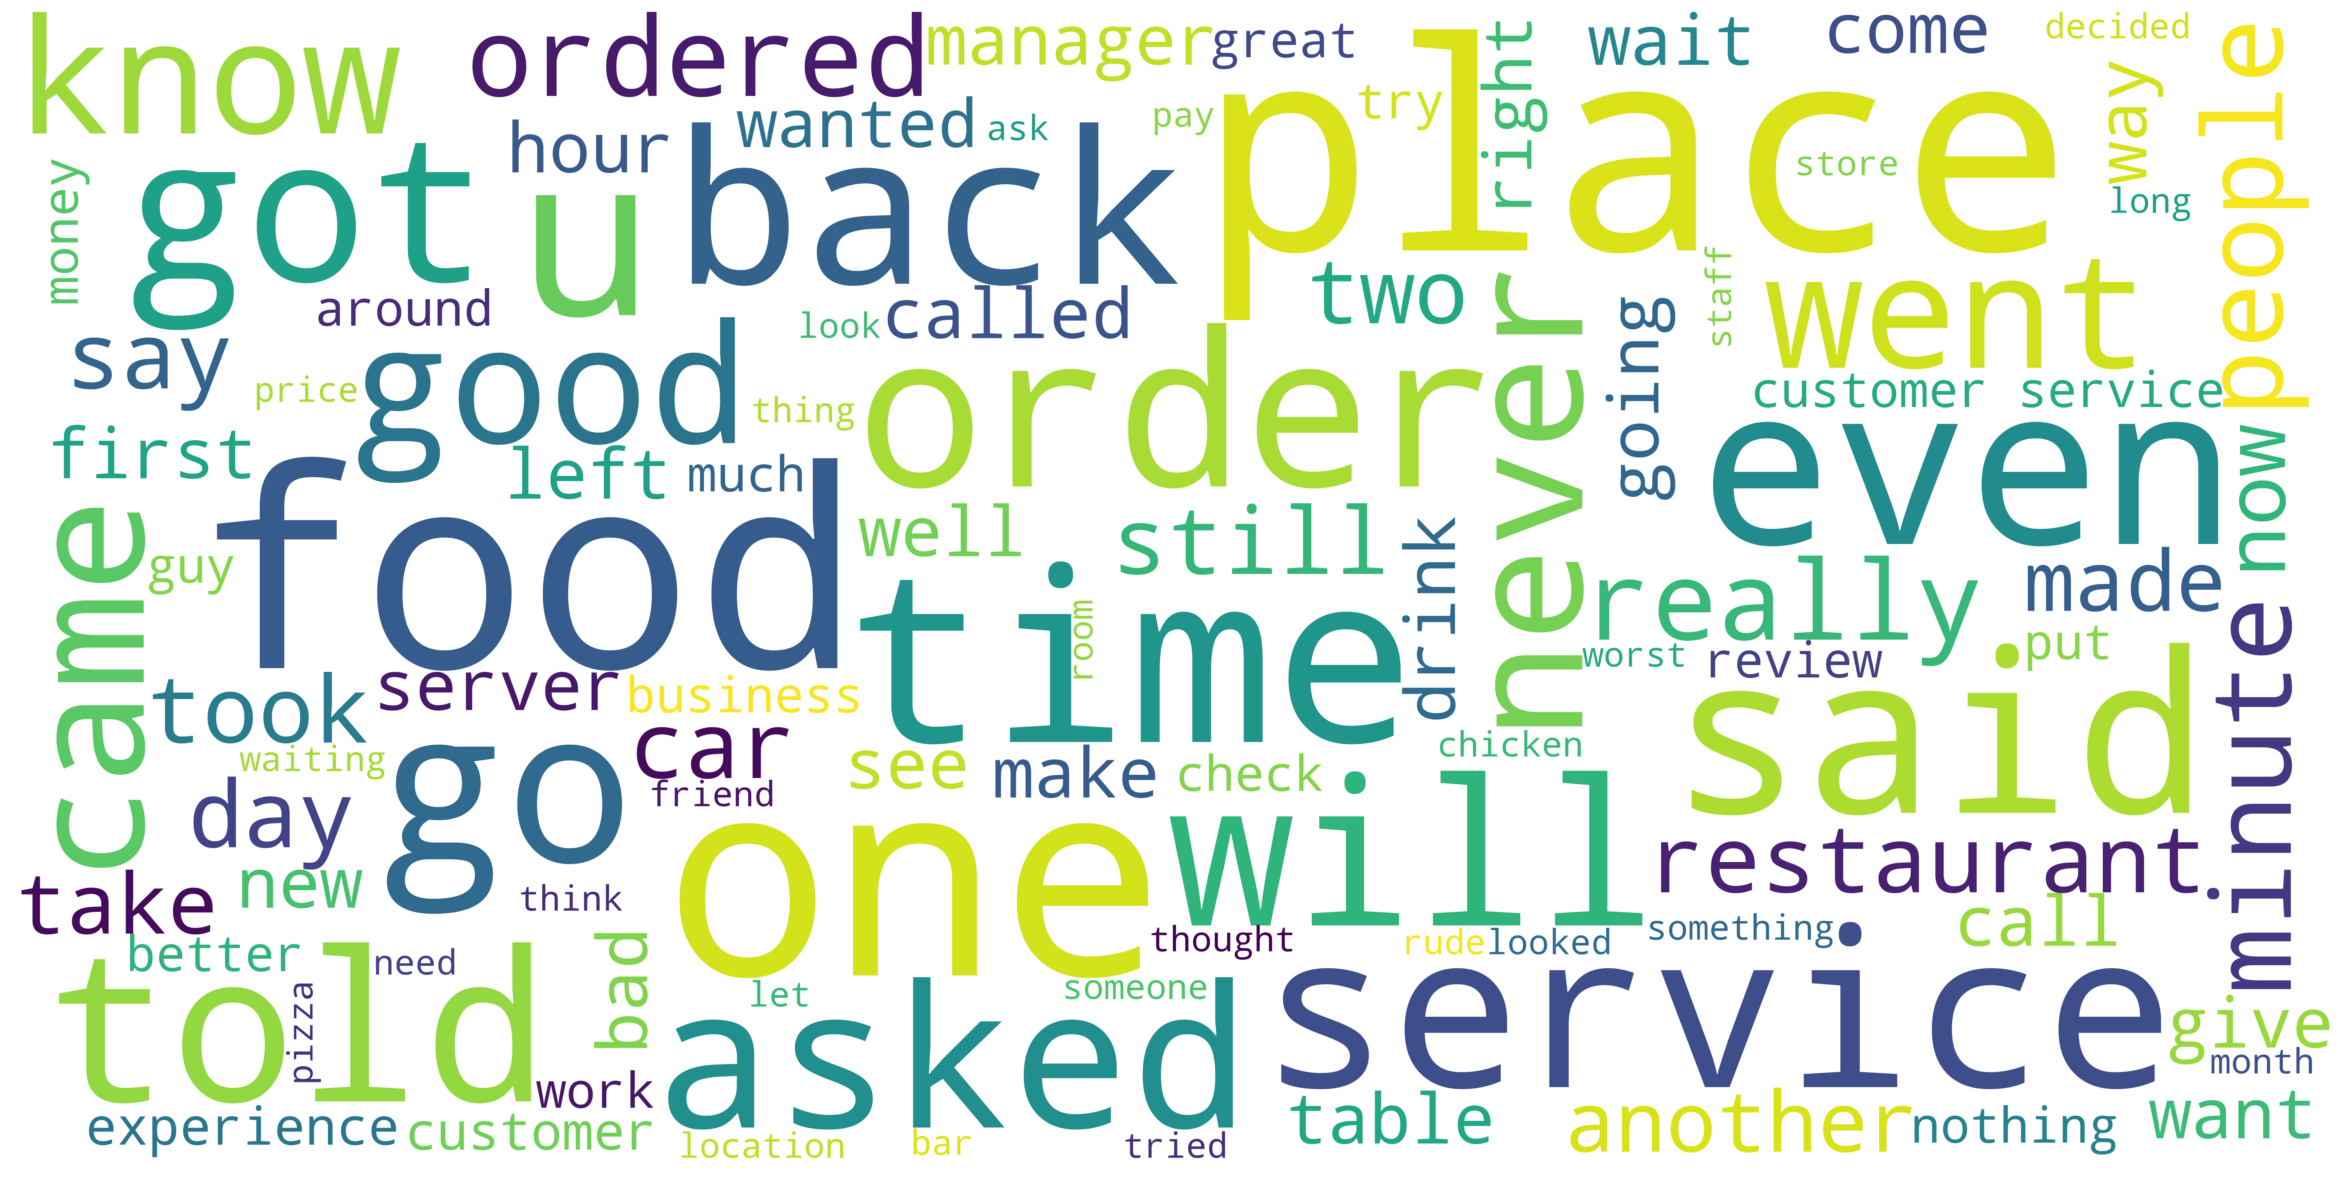

In [15]:
word_cloud_rating(data, 1)

### Ejercicio 4

La palabra "bueno" parece aparecer con bastante frecuencia en las críticas negativas. Investigue por qué es eso y proponga una explicación razonable.

**Respuesta.** Veamos las primeras 5 reseñas más o menos con calificaciones de 1 estrella para ver si hay algún patrón perceptible:

In [16]:
reviews_containing_good = [each for each in data[data.stars == 1].text if 'good' in each]
for review in reviews_containing_good[:20]:
    good_index = review.find("good")
    print(review[good_index-20:good_index+20].replace("\n", ""))

 NYC, we had really good ramen. listen
nd thought it sound good. First of all, 
 furniture might be good price but not w
d Centre and it was good. Sheppard Cen
cations. Always had good experiences at 
e?" He said it was "good". This really s
irst time was quite good, but the second
l it into something good. I asked that t
s place has so many good reviews. That w
st perplexed by the good reviews of this
g they do have some good regulars. Who, 
ad that's all we're good for apparently.
al, which is always good at any Sambalat
. That is where the good part ends. Ther
eat right that is a good move until they
r food and a pretty good deal for the pr
urself does it make good business sense 

ew was there was no good place to sit an
ized which is not a good experience. The


Al leer cada una de las reseñas, está claro que "bueno" a menudo se menciona en un contexto como "no es un buen lugar para sentarse" o "suena bien". Esto indica que en el mundo del texto no podemos guiarnos solo por palabras sueltas (también llamadas **1-grams**). El contexto de la oración o al menos las palabras que la rodean son muy necesarios para comprender el sentimiento de una oración.

## n-grams 

Dado que los 1-gramas son insuficientes para comprender el significado de ciertas palabras en nuestro texto, es natural considerar bloques de palabras o **n-gramas**.

La versión más simple del modelo n-grama, para $n > 1$, es el modelo **bigrama**, que analiza pares de palabras consecutivas. Por ejemplo, la oración "El veloz zorro marrón salta sobre el perro perezoso" tendría fichas "el veloz", "marrón veloz",..., "perro perezoso". La siguiente imagen explica este concepto:

<img src="ngrams.png" alt="ngrams" width="500"/>

Esto tiene ventajas y desventajas obvias sobre mirar las palabras individualmente:

1. Esto conserva la estructura del documento general, y
2. Allana el camino para analizar palabras en contexto; sin embargo,
3. La dimensión es mucho más grande

En la práctica, este último desafío puede ser realmente desalentador. Como ejemplo, *Guerra y paz* tiene 3 millones de caracteres, lo que se traduce en varios cientos de miles de 1 gramo (palabras). Si considera que el conjunto de todos los bigramas posibles puede ser tan grande como el cuadrado del número de 1-gramos, ¡esto nos lleva a cien mil millones de bigramas posibles! Si las técnicas clásicas de ML no son adecuadas para entrenar en 3 millones de caracteres, ¿cómo es posible que puedan manejar cien mil millones de dimensiones?

Por esta razón, a menudo es prudente comenzar extrayendo el mayor valor posible de 1 gramo, antes de avanzar hacia estructuras más complejas.

En esta sección también comenzamos a mirar nuevamente nuestra aplicación principal: calcular algunas características "interesantes" de nuestro corpus de revisiones.

Cuando se piensa en el análisis de palabras, el principal tema de interés es encontrar una representación *eficiente* y de *baja dimensión* para facilitar la visualización de documentos y análisis a mayor escala. Discutimos dos amplias categorías de representaciones de palabras:

1. `Representaciones basadas en recuento`: matrices palabra-palabra y palabra-documento.
2. `Incrustaciones de palabras`: incrustaciones espectrales, UMAP, word2vec, GloVe y muchas más.

Estos se utilizan a menudo para ayudar con las tareas posteriores, como la agrupación, la clasificación y el etiquetado, que se analizarán brevemente en un caso futuro. Las incrustaciones de palabras en particular se han convertido en una especie de posterchild. Estos, combinados con las redes neuronales (¡que también se discutirán en un caso futuro!), han llevado a muchas de las mejoras recientes de titulares en las tareas de NLP.

### Count-based representations 

Los n-gramas pertenecen a una categoría más amplia de técnicas conocidas como [**representaciones basadas en recuento**](https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage). Estas son técnicas para analizar documentos al indicar la frecuencia con la que ocurren ciertos tipos de estructuras.

Comencemos con 1-gramos (palabras). El tipo de información más simple sería si una palabra particular aparece en documentos particulares. Esto conduce a **matrices de co-ocurrencia de documentos de palabras**, donde la entrada $(W, X)$ de la matriz de documentos de palabras se establece en 1 si la palabra $W$ aparece en el documento $X$ y 0 en caso contrario. .

Hay muchas variantes de esto. En lugar del hecho de que buscamos representaciones de nuestros documentos basadas en recuentos, una variable natural es la siguiente: la entrada $(W, X)$ de la matriz del documento de palabras es igual al número de veces que la palabra $W$ ocurre en el documento $X$, en lugar de ser simplemente una variable binaria.

Vamos a crear una matriz de co-ocurrencia de documento de Word para nuestro conjunto de revisiones:

In [17]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(AllReviews)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df.head()

,00,000,0014,00429,00a,00am,00p,00pm,01,0146,...,可能說中文啊,在拉斯维加斯买了新房子,布艺隔热性不强,所以用了实木的百叶窗,推荐卓越窗帘给大家,本来想安装布艺窗帘,知道拉斯维加斯特别热,而且价格实惠,隔热,非常漂亮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ejercicio 5

Encuentre todas las palabras de alta frecuencia (1 % superior) y de baja frecuencia (1 % inferior) en las reseñas en general. (Sugerencia: importa la función `Contador()` de la clase `colecciones`).

In [18]:
from collections import Counter

all_reviews_text = ' '.join(AllReviews)
tokenized_words = nltk.word_tokenize(all_reviews_text)
word_freq = Counter(tokenized_words)

len(word_freq)

45160

In [19]:
# top 1% es ~463 words
print(word_freq.most_common(463))

[('.', 78511), ('the', 53690), (',', 49969), ('and', 43873), ('I', 39938), ('a', 35396), ('to', 30472), ('was', 23572), ('of', 20248), ('it', 16975), ('is', 16269), ('!', 15181), ('for', 15021), ('in', 14282), ('The', 11908), ('that', 11672), ('with', 11652), ('you', 10436), ('my', 9553), ('but', 9425), ('on', 9007), ("n't", 9006), ("'s", 8741), ('have', 8327), ('this', 7690), ('they', 7533), ('not', 7109), ('had', 7071), ('were', 6743), ('are', 6581), (')', 6361), ('we', 6182), ('at', 6008), ('so', 5935), ('(', 5646), ('place', 5548), ('be', 5493), ('good', 5436), ('as', 5408), ('me', 5100), ('food', 5029), ('It', 4757), ('here', 4464), ('like', 4422), ('out', 4330), ('there', 4202), ('just', 4064), ('do', 3939), ('all', 3891), ('very', 3812), ('or', 3724), ('great', 3688), ('get', 3672), ('time', 3656), ('one', 3648), ('We', 3631), ('from', 3564), ('would', 3530), ('up', 3527), ('did', 3425), ('their', 3311), ('which', 3294), ('if', 3291), ('...', 3221), ('an', 3112), ('They', 3103),

In [20]:
## bottom 1% es ~463 words
print(word_freq.most_common()[-463:-1])

[('2xs', 1), ('VIbe', 1), ('carve', 1), ('profiles', 1), ('Ishi-yaki', 1), ('Sockeye', 1), ('flasks', 1), ('chillax-with-friends', 1), ('Fino', 1), ('Vaz', 1), ('Knowledge', 1), ('Conversational', 1), ('scripted', 1), ('Charla', 1), ('myselfShe', 1), ('aurora', 1), ('back-in-the-day', 1), ('Coras', 1), ('interrupting', 1), ('Mojitos', 1), ('Elote', 1), ('locos', 1), ('SPEED', 1), ('MCDONALD', 1), ('truest', 1), ('tagged', 1), ('Cruz', 1), ('Jetson', 1), ('Schrager', 1), ('Vics', 1), ('FWIW', 1), ('Kimpton', 1), ('Hogs', 1), ('communiting', 1), ('Suggested', 1), ('277', 1), ('275-near', 1), ('365-far', 1), ('201-central', 1), ('unmarked', 1), ('corridors', 1), ('RP', 1), ('Gianfranco', 1), ('Adriatic', 1), ('Montepulciano', 1), ('unloaded', 1), ('bellmen', 1), ('unusable', 1), ('bad.', 1), ('subjective', 1), ('Loyd', 1), ('Roxy', 1), ('Burlesque', 1), ('Cleve', 1), ('attracks', 1), ('Fireplace', 1), ('undoubtably', 1), ('Phoenix\\/Scottsdale', 1), ('Would\\/will', 1), ('cowboys', 1), ('

Hagamos lo mismo con los bigramas. Aquí está el código para obtener el conjunto de bigramas para las primeras 5 revisiones:

In [21]:
from nltk.util import ngrams

first_5_revs = data.text[0:5]
word_tokens = nltk.word_tokenize(''.join(first_5_revs))
print(list(ngrams(word_tokens, 2))) #ngrams(word_tokens,n) gives the n-grams.

[('Super', 'simple'), ('simple', 'place'), ('place', 'but'), ('but', 'amazing'), ('amazing', 'nonetheless'), ('nonetheless', '.'), ('.', 'It'), ('It', "'s"), ("'s", 'been'), ('been', 'around'), ('around', 'since'), ('since', 'the'), ('the', '30'), ('30', "'s"), ("'s", 'and'), ('and', 'they'), ('they', 'still'), ('still', 'serve'), ('serve', 'the'), ('the', 'same'), ('same', 'thing'), ('thing', 'they'), ('they', 'started'), ('started', 'with'), ('with', ':'), (':', 'a'), ('a', 'bologna'), ('bologna', 'and'), ('and', 'salami'), ('salami', 'sandwich'), ('sandwich', 'with'), ('with', 'mustard'), ('mustard', '.'), ('.', 'Staff'), ('Staff', 'was'), ('was', 'very'), ('very', 'helpful'), ('helpful', 'and'), ('and', 'friendly.Small'), ('friendly.Small', 'unassuming'), ('unassuming', 'place'), ('place', 'that'), ('that', 'changes'), ('changes', 'their'), ('their', 'menu'), ('menu', 'every'), ('every', 'so'), ('so', 'often'), ('often', '.'), ('.', 'Cool'), ('Cool', 'decor'), ('decor', 'and'), ('a

### Ejericicio 6

Escribe una función llamada `top_k_ngrams(word_tokens, n, k)` para imprimir los primeros $k$ n-gramas. Utilice esta función para obtener los 10 mejores de 1, 2 y 3 gramos de las primeras 1000 reseñas de nuestro conjunto de datos.

In [22]:
from nltk.util import ngrams
def top_k_ngrams(word_tokens,n,k):

    ## Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))

    ### Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)
    
   # x_pos = [k for k,v in most_common_k]
   # y_pos = [v for k,v in most_common_k]
    
   # plt.bar(x_pos, y_pos,align='center')

In [23]:
### Getting a single string
top_1000_reviews = data.text[0:1000]
all_reviews_text = ' '.join(top_1000_reviews)

## Splitting them into tokens
word_tokens = nltk.word_tokenize(all_reviews_text)

## Calling the function for top k
top_k_ngrams(word_tokens, 1, 10)

[('.', 10874), ('the', 6929), (',', 6198), ('I', 5920), ('and', 5325), ('a', 4746), ('to', 4376), ('was', 3058), ('of', 2865), ('it', 2553)]


In [24]:
top_k_ngrams(word_tokens, 2, 10)

[('. I', 1956), ('. The', 1512), (', but', 866), ('. It', 726), ('of the', 601), (', and', 601), ('I was', 531), ('in the', 518), (', I', 465), ('it was', 439)]


In [25]:
top_k_ngrams(word_tokens, 3, 10)

[(". It 's", 241), ('. It was', 193), (', but I', 167), (". I 've", 163), ('. I was', 144), ("I do n't", 131), (". I 'm", 121), ('. The food', 106), (', but it', 103), ('. I had', 99)]


## Stop words

Es posible que haya notado un patrón en los tipos de palabras que aparecen en los 10 primeros 1 grams, 2 grams y 3 grams. En particular, estas son palabras comunes que aparecen en todas las oraciones del idioma inglés: pronombres como "yo", preposiciones como "pero", "de", "y", artículos como "el", etc. Estas palabras muy comunes son generalmente no informativo, y sus valores de ocurrencia muy grandes pueden distorsionar los resultados de muchos algoritmos de NLP.

Por esta razón, es común preprocesar el texto eliminando palabras que tiene motivos para creer que no son informativas; estas palabras se llaman [**palabras vacías**](https://en.wikipedia.org/wiki/Stop_words). Por lo general, basta con tratar las palabras extremadamente comunes como palabras vacías. Sin embargo, para tipos específicos de aplicaciones podría tener sentido utilizar otras palabras vacías; p.ej. la palabra "hamburguesa" al analizar reseñas de cadenas de hamburguesas.

(Tenga en cuenta que las palabras vacías a menudo se eliminan de forma predeterminada como un paso de limpieza en todas las tareas de NLP. Sin embargo, a veces pueden ser útiles. Por ejemplo, en la atribución de autoría (detectar automáticamente quién escribió un texto específico por su 'estilo de escritura'), Las palabras vacías pueden ser una de las características más útiles, ya que aparecen en casi todos los textos y, sin embargo, cada autor las usa de formas ligeramente diferentes).

La biblioteca `nltk` tiene una lista estándar de palabras vacías, que puede descargar escribiendo `nltk.download(“stopwords”)`. Luego podemos cargar el paquete de palabras vacías desde nltk.corpus y usarlo para cargar las palabras vacías:

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

### Ejercicio 7

#### 7.1

Filtre todas las palabras vacías en la primera revisión de los datos de revisión de Yelp e imprima su respuesta. Además, imprima (por separado) las palabras vacías que encontró en esta revisión.

In [28]:
stop_words = set(stopwords.words("english"))
without_stop_words = []
stopword = []
sentence = data.text[0]
words = nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print(stopword)
print()
print(without_stop_words)

['but', 'been', 'the', 'and', 'they', 'the', 'same', 'they', 'with', 'a', 'and', 'with', 'was', 'very', 'and']

['Super', 'simple', 'place', 'amazing', 'nonetheless', '.', 'It', "'s", 'around', 'since', '30', "'s", 'still', 'serve', 'thing', 'started', ':', 'bologna', 'salami', 'sandwich', 'mustard', '.', 'Staff', 'helpful', 'friendly', '.']


#### 7.2
Modifique la función `top_k_ngrams(word_tokens, n, k)` para eliminar las palabras vacías antes de determinar los n-gramas superiores.

In [29]:
# Removing the most basic stop words from the ntlk corpus and including only those
# words with character size above 2 so as to remove punctuations
# But, this could be extended to remove further high and low frequency stop words

from nltk.corpus import stopwords
import string
eng_stopwords = stopwords.words('english')

### Getting a single string
all_reviews_text = ' '.join(top_1000_reviews)

## Splitting them into tokens
word_tokens = nltk.word_tokenize(all_reviews_text)

## Removing the stopwords
word_tokens_clean = [each for each in word_tokens if each.lower() not in eng_stopwords and len(each.lower()) > 2]

## Calling the function for top k
top_k_ngrams(word_tokens_clean, 3, 10)

[('wait come back', 11), ("n't wait come", 10), ("n't feel like", 8), ("'ll definitely back", 8), ("'ve never seen", 8), ('give place try', 7), ('staff friendly helpful', 7), ('Vegas nearly years', 7), ('Las Vegas strip', 7), ('half dozen times', 7)]


En algunos contextos, es común eliminar palabras muy comunes y muy *poco comunes*. La idea es que las palabras comunes como "a" casi nunca son informativas, mientras que las palabras poco comunes como "syzygy" ocurren con tan poca frecuencia en un corpus que muchos algoritmos tienen dificultades para procesarlas de manera significativa. No nos ocuparemos de palabras poco comunes hoy, pero debe tener en cuenta que hacerlo mejora el rendimiento de varias técnicas de NLP.

## Encontrando palabras mas importantes 

Hasta este punto, nos hemos centrado en técnicas para transformar nuestros datos. Ahora estamos listos para comenzar a buscar algunas respuestas, así que tomemos un descanso de discutir técnicas para que podamos explorar nuestro conjunto de datos y varias formas de resumirlo.

Comenzamos mirando las palabras y los n-gramas que son más comunes en las reseñas positivas y negativas. Tenga en cuenta que en el siguiente código, no reutilizamos muchos de los pasos de preprocesamiento discutidos al comienzo del tutorial. Esto se debe a que muchos de ellos están incluidos como opciones en paquetes existentes. En un proyecto serio, a menudo se personalizaría este preprocesamiento hasta cierto punto, pero lo omitimos para obtener algunos resultados visibles.

In [30]:
def get_top_n_words(corpus, n=1,k=1):
    vec = CountVectorizer(ngram_range=(k,k),stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

good 5818
place 5617
food 5449
like 4628
great 4449
just 4440
time 3716
service 3365
really 3280
ve 2531
nice 2390
don 2328
little 2109
ordered 2022
love 1951
got 1929
came 1830
didn 1825
try 1814
menu 1732


<Axes: title={'center': 'Top 20 words from all reviews'}, xlabel='ReviewText'>

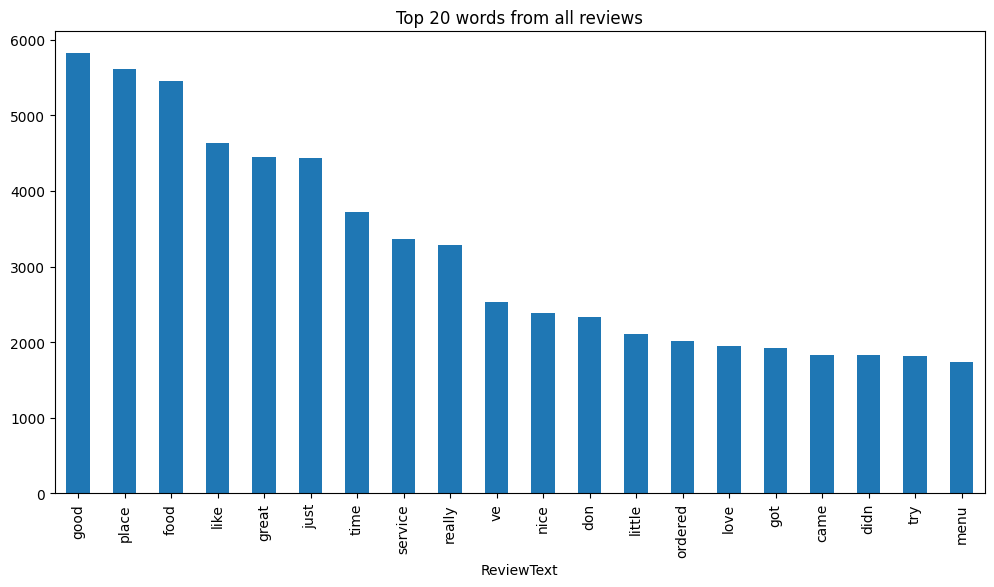

In [31]:
# Lista de palabras mas comunes

common_words = get_top_n_words(data['text'], 20,1)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title='Top 20 words from all reviews',figsize=(12,6))


### Ejercicio 8

#### 8.1

Divida los datos en "buenas críticas" (es decir, la calificación de "estrellas" fue superior a 3) y "malas críticas" (es decir, la calificación de "estrellas" fue inferior a 3) y haga un diagrama de barras de las 20 palabras principales en cada caso. ¿Son estos resultados diferentes a los anteriores?

good 3602
place 3502
great 3492
food 3043
like 2485
just 2356
time 2284
really 1997
service 1947
ve 1650
nice 1590
love 1548
little 1330
don 1253
delicious 1231
friendly 1226
best 1214
definitely 1176
staff 1126
try 1123


<Axes: title={'center': 'Top 20 words from good reviews'}, xlabel='ReviewText'>

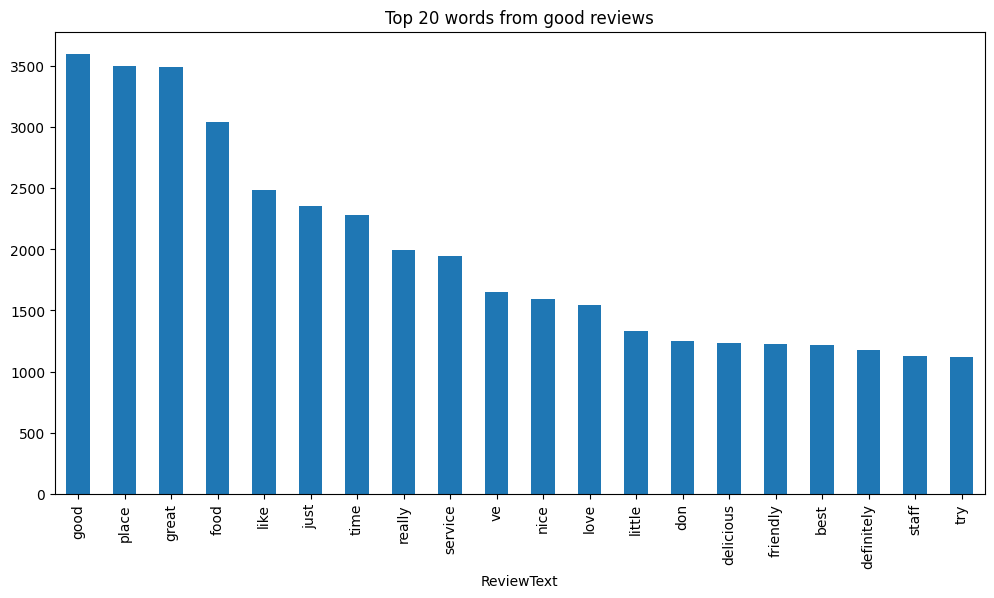

In [32]:
GoodInd = data['stars'] >3.1
GoodRev = data[GoodInd]
BadInd = data['stars'] <2.1
BadRev = data[BadInd]

common_words = get_top_n_words(GoodRev['text'], 20)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from good reviews',figsize=(12,6))

food 1252
just 1168
place 1122
like 1040
good 829
service 808
time 793
didn 561
really 559
don 556
got 529
said 524
did 515
ordered 502
order 494
came 467
minutes 438
ve 434
told 424
people 423


<Axes: title={'center': 'Top 20 words from bad reviews'}, xlabel='ReviewText'>

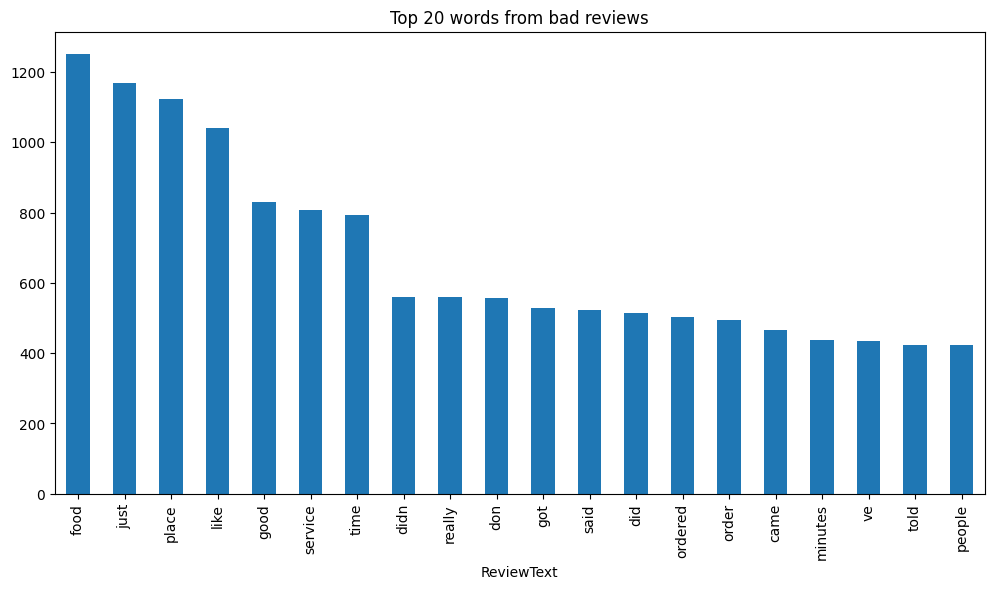

In [33]:
common_words = get_top_n_words(BadRev['text'], 20)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words from bad reviews',figsize=(12,6))

Bueno, eso fue bastante inútil. Las palabras "buenas" son en su mayoría una mezcla de palabras genéricas como "lugar" y palabras abiertamente positivas como "bueno" en sí mismo.

El problema aquí es que estamos tratando con palabras sueltas, que no pueden transmitir mucha información fuera de contexto. Entonces, la solución natural es trabajar con n-gramas, de modo que podamos obtener resultados sensibles al contexto como "buena hamburguesa" o "buen servicio" (en las críticas positivas) o, como vimos, "buenos 45 minutos" (en las críticas negativas).

#### 8.2
Usa la función `get_top_n_words()` para encontrar los 20 bigramas y trigramas principales. ¿Los resultados parecen útiles?

customer service 163
don know 83
20 minutes 61
10 minutes 60
tasted like 59
15 minutes 56
feel like 55
looked like 51
ice cream 47
make sure 45
happy hour 45
pretty good 42
didn want 41
minutes later 41
don think 41
food good 39
30 minutes 36
felt like 33
food just 31
place just 30


<Axes: title={'center': 'Top 20 bigrams from bad reviews'}, xlabel='ReviewText'>

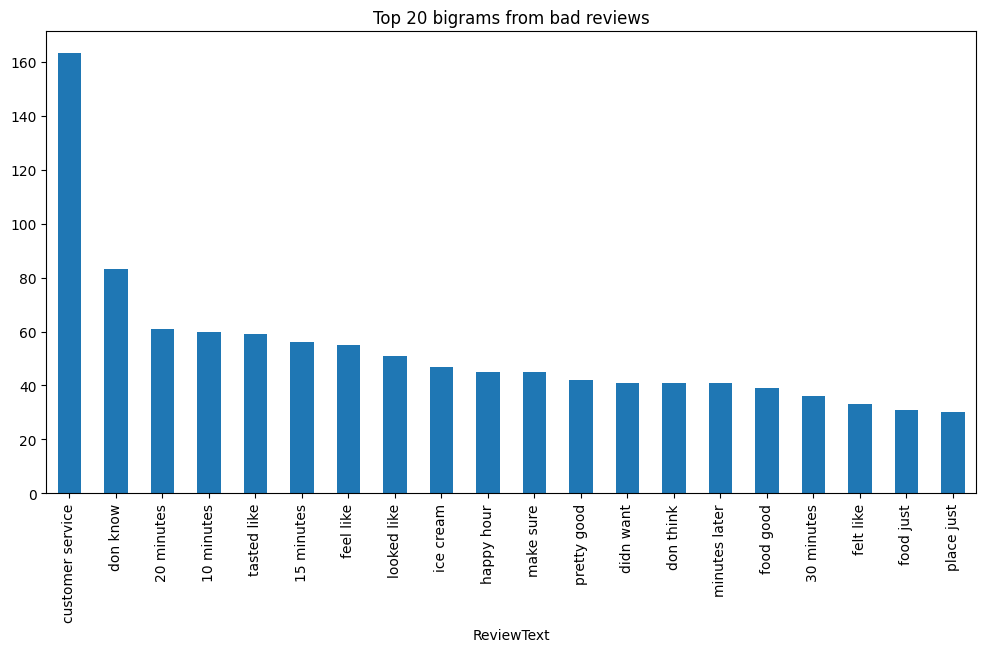

In [34]:
# Get top bigrams and trigrams from bad reviews
common_words = get_top_n_words(BadRev['text'], 20,2)

for word, freq in common_words:
    print(word, freq)

df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from bad reviews',figsize=(12,6))

worst customer service 9
took 10 minutes 9
wanted like place 8
warning warning warning 8
don waste time 7
waste time money 7
let just say 7
seated right away 7
ve experienced better 7
ce est pas 7
really wanted like 7
10 minutes later 7
horrible customer service 6
vanilla ice cream 6
meh ve experienced 6
french onion soup 6
took 20 minutes 6
qu il avait 6
asked speak manager 6
15 20 minutes 6


<Axes: title={'center': 'Top 20 trigrams from bad reviews'}, xlabel='ReviewText'>

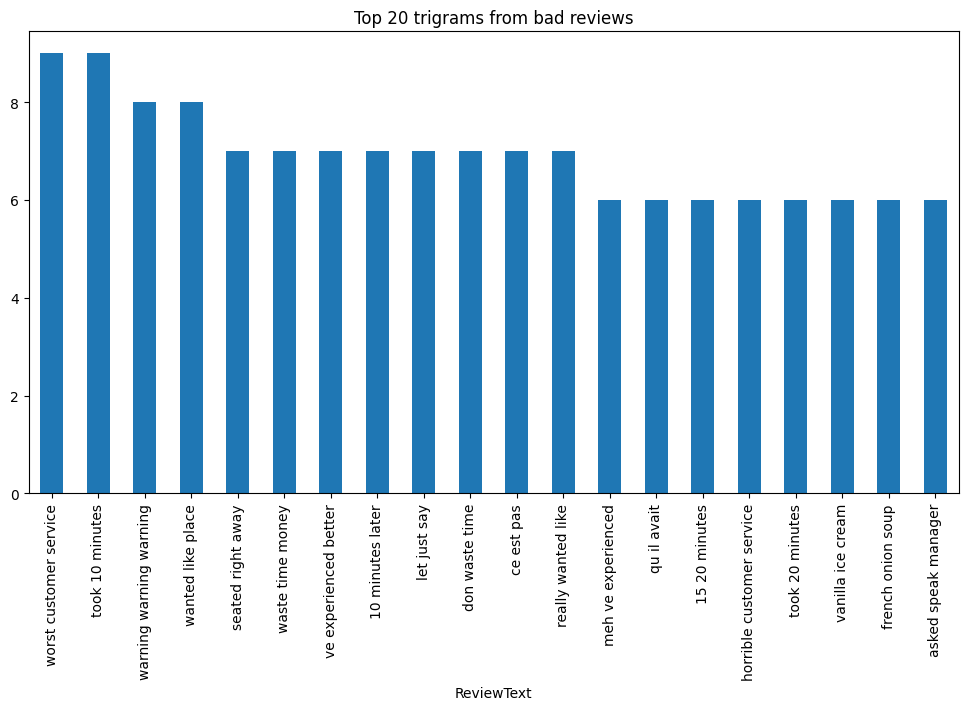

In [35]:
common_words = get_top_n_words(BadRev['text'], 20,3)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from bad reviews',figsize=(12,6))

really good 264
highly recommend 261
ice cream 219
las vegas 213
customer service 210
great place 203
make sure 200
love place 191
happy hour 188
staff friendly 182
great service 170
pretty good 161
feel like 161
service great 150
great food 148
food good 136
good food 131
don know 127
food great 117
really nice 112


<Axes: title={'center': 'Top 20 bigrams from good reviews'}, xlabel='ReviewText'>

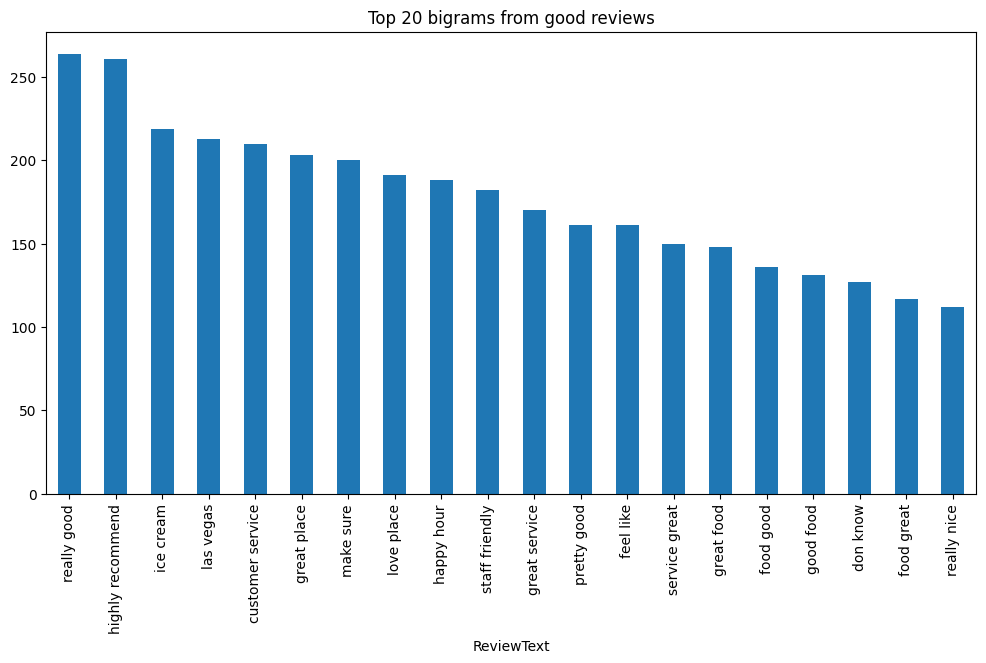

In [36]:
common_words = get_top_n_words(GoodRev['text'], 20,2)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams from good reviews',figsize=(12,6))

http www yelp 86
www yelp com 86
yelp com biz_photos 84
great customer service 40
did great job 37
sweet potato fries 32
staff friendly helpful 27
food really good 27
service great food 26
highly recommend place 25
love love love 24
great service great 22
staff super friendly 21
definitely recommend place 20
food great service 20
let just say 19
com biz_photos xnjeadlrlj9azb8qsdir2q 19
biz_photos xnjeadlrlj9azb8qsdir2q select 19
make feel like 18
com biz_photos mudalytuatnzm2k9zoh27q 17


<Axes: title={'center': 'Top 20 trigrams from good reviews'}, xlabel='ReviewText'>

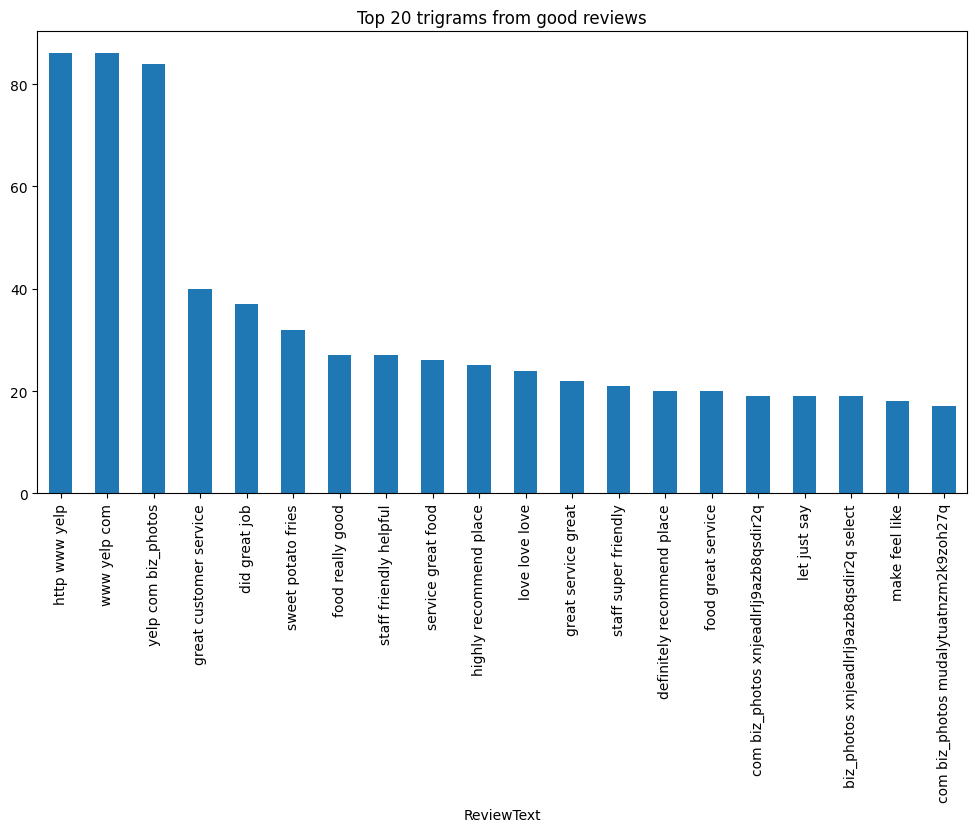

In [37]:
common_words = get_top_n_words(GoodRev['text'], 20,3)
for word, freq in common_words:
    print(word, freq)
df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams from good reviews',figsize=(12,6))

Aunque hay algunas entradas sin sentido, como "http www yelp", esto empieza a ser útil. Podemos ver algunos temas recurrentes entre las buenas críticas (por ejemplo, "personal amable y servicial"). Las entradas sin sentido suelen ser difíciles de eliminar por completo en NLP con texto generado por el usuario y corpus más pequeños. La PNL sigue siendo útil *a pesar* de la existencia de resultados sin sentido, y deberíamos pensar en el resultado de algoritmos de NLP como este como una *herramienta de detección* para encontrar frases importantes en lugar de una *estimación cuidadosa* de las frases más importantes. En otras palabras, es una aplicación de inteligencia artificial para *realizar análisis exploratorios* en lugar de *construir modelos predictivos*.

### Pregunta:

Mira los 5 bigramas más importantes para las malas críticas. ¿Qué problema *único y específico* parece ser el factor más importante de las malas críticas?

Tres de los 5 bigramas principales fueron "20 minutos", "15 minutos" y "10 minutos". Estos son todos los tiempos, *fuertemente* lo que sugiere que *el tiempo de espera para el servicio* es un factor principal para los malos puntajes de revisión.

### Ejercicio 9

#### 9.1

Es posible que haya notado que muchos de los bigramas "malos" importantes incluían las palabras "me gusta" o "simplemente", pero no parecían muy informativos (por ejemplo, "me sentí como", "solo comida"). Proporcione algunas ideas sobre cómo utilizar este tipo de observación en el futuro preprocesamiento de reseñas, basándose en las ideas de preprocesamiento que ya hemos estudiado.

**Respuesta.** Dos posibles respuestas son (hay muchas otras):

1. Habiendo reconocido que estas palabras van juntas en bigramas comunes, puede modificar su algoritmo para que "agrupe" estos bigramas; es decir, los trata como una sola palabra, de modo que su algoritmo se centre en las palabras que siguen.
2. Habiendo reconocido esto como una frase clave, podríamos tener una lista de las palabras más importantes que siguen a estas frases clave (que presumiblemente son informativas). Esto lleva más tiempo ya que requiere intervención humana.

#### 9.2

Sobre la base de la pregunta anterior, notamos que la mayoría de las quejas y elogios más importantes no se pueden observar *completamente* mirando bigramas o trigramas. Esto a menudo se puede solucionar con pequeñas modificaciones. Haz lo siguiente:

1. Escriba una queja que es poco probable que sea (completamente) detectada por el análisis de bigramas. Pista: ¿qué escribirías si te sirvieran la hamburguesa fría?
2. Escriba un paso de procesamiento que solucionaría este problema. Intente encontrar una solución que funcione para varios problemas similares sin intervención humana adicional.

**Respuesta.** Hay muchas buenas respuestas, pero nos enfocamos en una simple:

1. Probablemente escribiría "la hamburguesa estaba fría" o "la hamburguesa se sirvió fría". Si esta fuera una queja común, los bigramas más importantes podrían incluir "estaba frío" o "servido frío", lo que no me dice *qué* se sirvió frío.
2. Una solución simple, similar a la pregunta anterior, sería "agrupar" palabras como "hacía frío". Sin embargo, creo que esta es una mala solución, ya que se centra demasiado en la palabra "frío" y requeriría una gran cantidad de ajustes manuales. Una mejor idea sería reconocer que palabras como "era" siempre serán un problema en este contexto, ya que separan el sustantivo importante que describe al sujeto ("hamburguesa") del adjetivo que describe el problema ("frío"). Esto sugiere que deberíamos adoptar una postura *mucho* más agresiva para eliminar las palabras vacías. Esto ciertamente debería incluir conjugaciones de "ser" y probablemente muchas otras palabras comunes pero poco informativas (como "también").

Esta segunda respuesta es una conclusión importante para la NLP: este tipo de problema es extremadamente común y, a menudo, se dedica una gran cantidad de tiempo a ajustar las reglas iniciales de preprocesamiento. En la parte final de este caso, aprenderá acerca de un método que puede ayudarlo a lidiar sistemáticamente con estas palabras vacías poco informativas.

## Regular Expressions 

Después de haber dedicado mucho tiempo a los n-gramas y cómo caracterizar un documento usándolos, ahora nos tomamos un descanso de las herramientas `nltk` para presentar la herramienta de edición de texto más importante en Python (y muchos otros lenguajes): [**regular expresiones**](https://en.wikipedia.org/wiki/Regular_expression).

La idea básica aquí es que a menudo desea realizar alguna transformación específica (por ejemplo, eliminar o sustituir) cada vez que algún patrón posiblemente complicado (por ejemplo, la letra 'A', la palabra 'hola', cualquier palabra que contenga las letras 'a' ,'r' en ese orden) ocurre. Las expresiones regulares son un lenguaje compacto y poderoso para expresar este tipo de patrones. Esto es muy importante cada vez que intenta limpiar un conjunto de datos de texto que contiene errores temáticamente similares, pero no exactamente iguales.

La concisa sintaxis de las expresiones regulares les ha llevado a tener la reputación de ser [casi mágicas](https://xkcd.com/208/) en algunas situaciones (con solo unos pocos caracteres, puede crear programas informáticos completos), pero también por ser difíciles de crear y leer, lo que puede [crear más problemas](https://xkcd.com/1171/) de los que resuelve.

En Python, [el módulo `re`](https://docs.python.org/3/library/re.html) proporciona operaciones de coincidencia de expresiones regulares y operaciones comunes. Las expresiones regulares son un tema profundo, con alguna documentación aquí: https://docs.python.org/3/library/re.html?highlight=regex.

Como algunos ejemplos simples, tenemos:

1. `.` matches any character except \n (newline)
2. `\d` matches any digit (this can also be written as [0-9])
3. `\D` matches any non-digit (this can also be written as [^0-9])
4. `\w` matches any alphanumeric character ([a-zA-Z0-9_])
5. `\W` matches any non-alphanumeric character ([^a-zA-Z0-9_])

Como algunos ejemplos más complejos, las expresiones regulares también le permiten cuantificar la cantidad de veces que pueden ocurrir coincidencias. Por ejemplo,

1. `[a-d]+` matches any time you get $\{a,b,c,d\}$ one or more times in a row
2. `[a-d]{3}` matches any time you get them exactly 3 times in a row
3. `[a-d]*` matches any time you get them 0 or more times in a row

Por ahora, ofrecemos una aplicación simple basada en la función `re.sub()`, que sustituye las palabras que coinciden con un patrón:

In [38]:
import re
sentence = 'That was an "interesting" way to cook bread.'
pattern = r"[^\w]" # the ^ character denotes 'not', 
#                   the \w character denotes a word, and []  means
#                    anything that matches anything in the brackets. 
#                     Together, this refers to any character that is not a word.
print(re.sub(pattern, " ", sentence))

That was an  interesting  way to cook bread 


In [39]:
str = "Natesh loves all the foold and loveds sdaslo"
x   = re.compile('lo')
iterator = x.finditer(str)
for item in iterator:
    print(item.span())
    print(item.group())

(7, 9)
lo
(31, 33)
lo
(42, 44)
lo


### Ejercicio 10

#### 10.1

1. Utilice la función `re.split()` para dividir la primera reseña de Yelp en una lista de sus palabras constituyentes.
2. Utilice la función `re.findall()` para buscar en las primeras 30 reseñas el número de veces que contienen la palabra "comida". Escriba el número máximo de veces que se menciona la palabra "comida" en una sola reseña.

In [40]:
re.split(r'\s', AllReviews.values[0])

['Super',
 'simple',
 'place',
 'but',
 'amazing',
 'nonetheless.',
 "It's",
 'been',
 'around',
 'since',
 'the',
 "30's",
 'and',
 'they',
 'still',
 'serve',
 'the',
 'same',
 'thing',
 'they',
 'started',
 'with:',
 'a',
 'bologna',
 'and',
 'salami',
 'sandwich',
 'with',
 'mustard.',
 '',
 '',
 'Staff',
 'was',
 'very',
 'helpful',
 'and',
 'friendly.']

In [41]:
food_count = []
for sentence in AllReviews.values:
    temp = len(re.findall('food', sentence))
    food_count.append(temp)
print(max(food_count[0:30]))

2


#### 10.2

Usando expresiones regulares, encuentre el porcentaje de reseñas en las 500 reseñas principales que tienen números en ellas.

In [42]:
### Considering the top 500 reviews for this analysis
top_500_reviews = AllReviews.values[:500]
reviews_nos_regex = []

for each_review in top_500_reviews:
    number_list = re.findall('\d',each_review)
    
    ## number list returns all the possible digits in a review
    ## Look if the number list is empty - if so, the review has no digits in them
    if(len(number_list)) > 0:
        reviews_nos_regex.append(each_review)

In [43]:
len(reviews_nos_regex)/len(top_500_reviews)

0.326

Como se desprende de lo anterior, las expresiones regulares son muy útiles para extraer propiedades más generales del texto. Estas propiedades no son tan informativas o conscientes del contexto como pueden ser los n-gramas, pero son mucho más simples de codificar y, por lo tanto, a menudo pueden servir como el primer paso de un EDA en datos de texto.

Aunque las expresiones regulares no suelen decirnos mucho sobre el contexto en general, *pueden* usarse para encontrar instancias específicas de palabras en contexto. Por ejemplo, puede que nos interese encontrar la primera palabra que sigue a "bueno" o "malo" en una reseña (lo que puede ayudarnos a distinguir una reseña positiva de una negativa). Escribamos un código que encuentre la primera palabra después de "bueno" en la oración "hola, quiero una buena hamburguesa, por favor":

In [44]:
sample = "hello I want a good burger, please"

# Find everything after "good", including "good"

post = re.findall(r'good.*', sample)[0]

print(post)

# Take just the first word after "good"

first_post = re.split(r'\s',post)[1]

print(first_post)

good burger, please
burger,


#### 10.3

Usando lo anterior como plantilla, escriba una función generalizada que pueda extraer la primera palabra después de "bueno". No olvide incluir un comportamiento predeterminado para cuando la palabra no aparece en la oración. Ejecute esta función para todas las reseñas e imprima los primeros 300 resultados de las reseñas que contienen la palabra "bueno".

In [45]:
def next_word(sentence):
    post = re.findall(r'good.*', sentence)
    if (len(post) > 0):
        temp = re.split(r'\s',post[0])
        if (len(temp) > 1):
            return(temp[1])
        else:
            return('')
    else:
        return('')
    
    
print(next_word(sample))


burger,


In [46]:
post_good = []
ind = 0
for sentence in AllReviews.values:
    temp = next_word(sentence)
    post_good.append(temp)
    
nonempty = [i for i in post_good if i] 
print(nonempty[0:300])

['Burgers', 'bully', 'The', 'burgers', 'things', 'Too', 'size', 'they', '45', 'Soft', '-', 'and', 'and', 'for', 'Hot', 'for', 'Price', 'for', 'really', 'ramen.', 'First', 'The', 'size', 'Definitely', '-', 'I', 'as', 'deal!', 'with', 'in', 'price', 'as', 'food', 'What', 'to', 'Finally,', 'actually.', 'The', 'but', 'experiences', 'and', 'however', 'if', 'so', '(she', 'experiences', 'experiences', 'size', 'experience', 'This', 'My', 'but', 'at', 'Mexican', '(for', 'and', 'the', 'ones,', 'but', 'My', 'I', 'The', 'but', 'but', 'food', 'size', "I'm", 'reviews.', "I'd", 'but', 'idea', 'things,', 'The', 'as', 'as', 'good,', 'as', 'But', 'opinions', 'selection', 'so', 'although', 'and', 'little', 'pulled', 'time', 'Crispy', 'reviews,', 'reviews', 'Mexican', 'service', 'reviews.', 'is', 'and', 'to.', 'directions', 'service.', 'and', 'french', 'part', 'for', 'He', 'Besides', 'and', 'and', 'experience.', 'time.', 'burger!', 'and', 'work', 'and', 'But', 'thing.', 'sign.', 'time.', 'I', 'in', 'so', 

Repasando los resultados del ejercicio anterior, se destacaron algunas cosas:

1. A la gente le gusta hablar de buenas hamburguesas: esto apareció 5 veces en los primeros 300 resultados.
2. Una gran parte de los resultados son inútiles. Un problema común es la aparición de un límite de oración; p.ej. "bien. El" cerca del comienzo de la lista. En este caso, deberíamos mirar *antes* de la palabra "bueno" en lugar de después. Sin embargo, no podemos buscar *inmediatamente* antes de bueno; esa palabra generalmente será una conjugación de "to be", que tampoco es informativa; más bien, debemos buscar una palabra antes de "bueno" que no sea demasiado. aburrido. Otras veces, hay una palabra después de "bueno" que no es informativa; p.ej. "bueno para": ¡queremos saber *para* qué* algo fue bueno! En este caso, deberíamos seguir hojeando *adelante* hasta que veamos una palabra después de "bueno" que no sea demasiado aburrida.

En ambos casos, no podemos usar expresiones regulares simples por sí mismas, ya que las expresiones regulares no saben cómo ignorar palabras "aburridas". Las expresiones regulares solo pueden ayudarnos a filtrar la estructura de las palabras, no el contenido que transmiten dentro de un contexto. *Podemos* usar lo que aprendimos sobre las palabras vacías para eliminarlas de las reseñas antes de realizar el análisis anterior, pero como lo hemos hecho, a veces aún obtendremos frases no muy informativas como "estaba frío" o "servido frío". Por lo tanto, presentaremos un método alternativo, que se puede aplicar para eliminar aún mejor las palabras vacías: **Part of Speech POS**.

##  Part-of-speech (POS) tagging 

En inglés, hay ocho partes principales del discurso: `sustantivos`, `pronombres`, `adjetivos`, `verbos`, `adverbios`, `preposiciones`, `conjunciones` e `interjecciones`. Estos son
`sustantivos`, `pronombres`, `adjetivos`, `verbos`, `adverbios`, `preposiciones`, `conjunciones` e `interjecciones`, respectivamente, en español. El propósito del etiquetado POS es etiquetar cada palabra en un documento con su parte del discurso.

Como era de esperar, el [etiquetado de POS](http://www.nltk.org/book/ch05.html) puede ser muy difícil de hacer a mano. `nltk` tiene una función predeterminada para esto, llamada `nltk.pos_tag()`, que usaremos. Como advertencia, esta función está lejos de ser infalible, especialmente en texto informal (p. ej., reseñas de sitios web, publicaciones en foros, mensajes de texto, etc.), y las palabras en inglés a menudo exhiben una deriva de POS (p. ej., la deriva de "Google" de sustantivo a verbo):

In [47]:
import nltk
nltk.download('averaged_perceptron_tagger')
#https://www.nltk.org/book/ch05.html
text_word_token = nltk.word_tokenize("Natesh is having a good day")
#text_word_token = nltk.word_tokenize(data.text[0])
nltk.pos_tag(text_word_token)
#https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Natesh', 'NNP'),
 ('is', 'VBZ'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('day', 'NN')]

In [48]:
text_word_token = nltk.word_tokenize("We are going to Race") # try "Race can be both a verb and a noun"
#text_word_token = nltk.word_tokenize(data.text[0])
nltk.pos_tag(text_word_token)

[('We', 'PRP'), ('are', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('Race', 'VB')]

In [49]:
#https://www.nltk.org/_modules/nltk/tag/perceptron.html
nltk.pos_tag(words)

[('Super', 'NNP'),
 ('simple', 'JJ'),
 ('place', 'NN'),
 ('but', 'CC'),
 ('amazing', 'JJ'),
 ('nonetheless', 'RB'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('been', 'VBN'),
 ('around', 'IN'),
 ('since', 'IN'),
 ('the', 'DT'),
 ('30', 'CD'),
 ("'s", 'POS'),
 ('and', 'CC'),
 ('they', 'PRP'),
 ('still', 'RB'),
 ('serve', 'VBP'),
 ('the', 'DT'),
 ('same', 'JJ'),
 ('thing', 'NN'),
 ('they', 'PRP'),
 ('started', 'VBD'),
 ('with', 'IN'),
 (':', ':'),
 ('a', 'DT'),
 ('bologna', 'NN'),
 ('and', 'CC'),
 ('salami', 'NN'),
 ('sandwich', 'NN'),
 ('with', 'IN'),
 ('mustard', 'NN'),
 ('.', '.'),
 ('Staff', 'NNP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('helpful', 'JJ'),
 ('and', 'CC'),
 ('friendly', 'JJ'),
 ('.', '.')]

NLTK proporciona documentación para cada etiqueta, que se puede consultar utilizando la propia etiqueta; p.ej. `nltk.help.upenn_tagset('RB')`. Dado que el POS es sensible al contexto, los etiquetadores de POS generalmente deben estar capacitados en un corpus existente que ha sido etiquetado por lingüistas profesionales (posiblemente junto con datos no etiquetados para aprovechar los métodos semisupervisados). El conjunto de etiquetas más popular se llama conjunto Penn Treebank:

In [50]:
# We can get more details about any POS tag using the help function of nltk
nltk.download('tagsets')
nltk.help.upenn_tagset('CD$')
nltk.help.upenn_tagset('NN$')

CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


### Ejercicio 11

#### 11.1

Escriba un código para encontrar el porcentaje de reseñas en las primeras 500 reseñas del conjunto de datos que contiene un número p Cardinal usando solo etiquetas de POS. (Sugerencia: la etiqueta POS `CD` es el indicador de cardinal o número). ¿Cómo se compara esto con la cifra que extrajimos usando solo expresiones regulares?

In [51]:
cardinal_review = []

for sentence in top_500_reviews:
    words = nltk.word_tokenize(sentence)
    cd_len = [k for k,v in nltk.pos_tag(words) if 'CD' == v]
    
    if len(cd_len) > 0:
        cardinal_review.append(sentence)

#### Proportion of reviews with a number/cardinal in it        
len(cardinal_review)/len(top_500_reviews) 
## 56.6% of the reviews have a number/cardinal in the top 500 reviews. 
## You could improve the accuracy of this estimate by looking at more than 500 reviews.

0.566

¡Este número es considerablemente más alto que el que obtuvimos al usar solo expresiones regulares! El motivo es que el etiquetado de POS puede extraer números en forma de texto (por ejemplo, "uno", "dos") mientras que las expresiones regulares no pueden. Esta es una de las ventajas de usar el etiquetado POS sobre las expresiones regulares.

#### 11.2

Extrae todos los sustantivos de cada reseña usando el etiquetado POS. Esto puede ser útil para un análisis posterior. Aunque palabras como "bueno" pueden ser las más frecuentes en las buenas reseñas, creemos que sustantivos como "servicio" o "hamburguesas" probablemente sean más informativos.

In [52]:
noun_reviews = []
for sentence in AllReviews.values:
    words = nltk.word_tokenize(sentence)
    noun_pt = [k for k,v in nltk.pos_tag(words) if 'NN' == v]
    noun_reviews.append(noun_pt)

### Ejercicio 12

Use el etiquetado de POS para encontrar la primera palabra después de "bueno" que tenga una etiqueta de POS interesante. Dejamos esto a su discreción, pero probablemente debería incluir sustantivos y nombres propios. Inspeccionando lo anterior, creemos que los cardenales también son casi ciertamente interesantes: reconocemos que "buenos 45" probablemente sea seguido por "minutos", ¡definitivamente una parte importante (aunque no "buena") de una revisión!

In [53]:
# First, a function that extracts only the "interesting" parts of speech

sentence = "This is a good burger, but I prefer pizza"
words = nltk.word_tokenize(sentence)
interesting = [k for k,v in nltk.pos_tag(words) if v in ['CD','FW','NN','NNS','NNP','NNPS']]

print(interesting)

['burger', 'pizza']


In [54]:
good_pos = ['CD','FW','NN','NNS','NNP','NNPS']

def ExtractInteresting(sentence, good):
    words = nltk.word_tokenize(sentence)
    interesting = [k for k,v in nltk.pos_tag(words) if v in good]
    return(interesting)

In [55]:
# Next, a function that extracts the first "interesting" word that follows "good"

sentence = "This is a good burger, but I prefer pizza"
post = re.findall(r'good.*', sentence)
print(post)
# Check that post isn't empty here before doing next line
temp = ExtractInteresting(post[0],good_pos)
print(temp)
# Check that temp isn't empty here before doing next line
print(post[0])

['good burger, but I prefer pizza']
['burger', 'pizza']
good burger, but I prefer pizza


In [56]:
def next_word2(sentence):
    post = re.findall(r'good.*', sentence)
    if (len(post) > 0):
        temp = ExtractInteresting(post[0],good_pos)
        if (len(temp) > 0):
            return(temp[0])
        else:
            return('')
    else:
        return('')
    
    
print(next_word2(sentence))

burger


In [57]:
# Finalmente esto por fin

post_good = []
ind = 0
for sentence in AllReviews.values:
    temp = next_word2(sentence)
    post_good.append(temp)
    
nonempty = [i for i in post_good if i] 
print(nonempty[0:300])

['Burgers', 'sticks', 'bread', 'burgers', 'things', 'kitchen', 'size', 'smoothies', '45', 'way', '2', 'lunch', 'drink', 'Hot', 'groups', 'Price', 'place', 'options', 'ramen', 'First', 'restaurant', 'size', 'items', 'bit', 'one', 'spot', 'deal', 'setup', 'chocolate', 'price', 'food', 'finesse', 'poutinerie', 'hairdresser', 'bell', 'waiter', 'cream', 'experiences', 'combinations', 'fudge', 'nothing', 'ya', 'cappuccino', 'experiences', 'experiences', 'size', 'experience', 'sign', 'sister', 'time', 'Mexican', 'try', 'peppers', 'cauliflower', 'ones', 'goods', 'toast', '9.98', 'perogies', 'way', 'minutes', 'food', 'size', 'choice', 'reviews', 'pass', 'principle', 'idea', 'things', 'pizza', 'one', 'service', 'fact', 'woman', 'NOTHING', 'opinions', 'selection', 'try', 'mussels', 'atmosphere', 'pub', 'tasting', 'time', 'Crispy', 'reviews', 'reviews', 'restaurants', 'service', 'reviews', 'lot', 'lot', 'Everyone', 'directions', 'service', 'order', 'fry', 'part', 'food', 'plenty', 'kind', 'waiter'

¡Esta parece una lista mucho más interesante!

### Ejercicio 13

Es interesante observar específicamente los adjetivos (que tienen un nombre de etiqueta de "JJ" en NLTK) al mirar las reseñas. Podemos suponer que las buenas críticas y las malas críticas pueden usar adjetivos muy diferentes, pero que algunos adjetivos pueden aparecer a menudo tanto en las buenas como en las malas críticas, como vimos anteriormente con la palabra "bueno".

Use etiquetas POS para extraer todos los adjetivos de las primeras 500 reseñas de cinco estrellas y las primeras 500 reseñas de una estrella. Extraiga los 30 adjetivos más utilizados de cada conjunto de reseñas e imprima ambos. Tome nota de varios de estos; decir si aparecen en una o en ambas listas, y si esto se esperaba o no, y por qué.

In [58]:
one_star_reviews = data[data['stars']==1]['text'][:500]
five_star_reviews = data[data['stars']==5]['text'][:500]


def extract_specific_pos(reviews, pos_tag):
    results = [] 
    for review in reviews:
        words = nltk.word_tokenize(review)
        tagged = nltk.pos_tag(words)
        keep = [x[0] for x in tagged if x[1] == pos_tag]
        results += keep
    return results


negative_adjectives = extract_specific_pos(one_star_reviews, "JJ")
positive_adjectives = extract_specific_pos(five_star_reviews, "JJ")

print(Counter(negative_adjectives).most_common(30))
print(Counter(positive_adjectives).most_common(30))

[('good', 148), ('other', 134), ('bad', 91), ('first', 76), ('few', 71), ('great', 70), ('many', 62), ('new', 60), ('same', 56), ('last', 56), ('next', 54), ('sure', 51), ('small', 46), ('long', 44), ('much', 44), ('nice', 43), ('rude', 43), ('wrong', 41), ('terrible', 40), ('second', 38), ('different', 36), ('old', 36), ('disappointed', 36), ('several', 35), ('empty', 33), ('horrible', 32), ('little', 32), ('awful', 31), ('poor', 31), ('hard', 31)]
[('great', 211), ('good', 158), ('other', 101), ('little', 94), ('delicious', 93), ('nice', 86), ('few', 79), ('friendly', 75), ('sure', 71), ('favorite', 63), ('first', 62), ('new', 58), ('much', 55), ('fantastic', 51), ('many', 50), ('perfect', 49), ('amazing', 48), ('different', 48), ('same', 46), ('fresh', 44), ('small', 44), ('awesome', 39), ('wonderful', 39), ('happy', 37), ('right', 37), ('super', 37), ('last', 36), ('large', 35), ('clean', 34), ('big', 34)]


Como vimos antes, la palabra "bueno" aparece en ambas listas, aunque un poco más a menudo en las buenas críticas. Sorprendentemente, es el adjetivo más común utilizado en las críticas *malas*.

Palabras como "decepcionado", "horrible", "horrible" y "grosero" solo aparecen con frecuencia en las malas críticas, como era de esperar, mientras que palabras como "favorito", "genial", "fantástico", "increíble", "maravilloso" , y "perfecto" aparecen en buenas críticas, lo que también se espera.

Palabras como "pequeño" y "nuevo" aparecen con frecuencia en ambos conjuntos de reseñas. Curiosamente, también lo hace "diferente", pero un poco más a menudo en las buenas críticas, lo que quizás indica que a la gente le gusta la variedad.

## Conclusiones

En este caso, nos enfocamos en los componentes básicos de una canalización de NLP, prácticamente todos los cuales se usan con frecuencia *antes* de construir un modelo para la pregunta comercial de interés. Vimos que cada parte de la tubería era altamente personalizable y discutimos cómo los parámetros pueden variar según la aplicación específica en mente.

Además de construir una tubería básica, intentamos dar respuestas iniciales a una pregunta comercial: "¿Qué factores son los más importantes para las malas críticas?" Las respuestas que obtuvimos con este análisis listo para usar no fueron perfectas, pero parecían brindar información realmente útil. Por ejemplo, 3 de las 5 frases más importantes para las malas críticas fueron "20 minutos", "10 minutos" y "15 minutos", una fuerte evidencia de que los largos tiempos de servicio fueron un factor importante en las malas críticas.

## Algunos puntos importantes

El preprocesamiento de texto es más complejo que otras formas de preprocesamiento con las que podría estar familiarizado, ya que un buen preprocesamiento puede basarse en una enorme cantidad de reglas extraídas de grandes corpus de texto en inglés (¡español!). No debería intentar recrear este trabajo usted mismo; en su lugar, aproveche las bibliotecas grandes y potentes, como `nltk`, que tienen corpus integrados cuando sea posible, y use expresiones regulares cuando sea necesario para ampliarlas o modificarlas.

El preprocesamiento es una parte extremadamente importante y no trivial de NLP, y probablemente tomará la mayor parte del trabajo para la mayoría de los proyectos de PNL. Las partes más populares del pipeline vienen con muchos parámetros. Sin embargo, pueden proporcionar resúmenes sorprendentemente útiles de corpus completos sin muchos ajustes.

En general, la NLP se puede usar en muchas situaciones, pero quizás sea más útil en su capacidad para convertir datos cualitativos en datos cuantitativos. Por ejemplo, si tenemos una colección de reseñas que describen, cualitativamente, las experiencias de las personas en los restaurantes, podemos obtener información cuantitativa como "X% de las personas que dejaron malas reseñas no estaban contentas con el tiempo de espera".

Después de seguir este caso, sabes qué es NLP y cómo puede ser útil. sabes especialmente

* Los retos de la NLP: especificidad de contexto y alta dimensionalidad.
* Cómo estandarizar y preprocesar el texto antes de realizar el análisis, como la lematización
* Cómo tokenizar documentos en oraciones y palabras
* Cómo crear nubes de palabras para obtener rápidamente información de alto nivel sobre el texto
* Qué son los n-gramas y cómo se pueden crear y utilizar en el análisis
* Por qué las palabras comunes ("stopwords") a menudo deben eliminarse antes del análisis
* Cómo encontrar palabras comunes y n-gramas
* Qué son las expresiones regulares y cómo usarlas para realizar análisis más personalizados
* Qué es el etiquetado de partes del discurso y por qué puede ser útil analizar documentos por su estructura gramatical